# Ford GoBike System Data Findings
## by Guilherme Teixeira de Mello

## Investigation Overview

> This presentation was made in order to find some patterns in the usage of the service in question, and my goal here is, of course, try to see how we could, at the same time, improve the users' experience using the service and also improve the numbers of users in order to provide the company means to increase the range of the service.

## Dataset Overview

> The data was gathered into Udacity's classroom environment, and it contains data related to the service use in the year of 2019. The data has information about the duration of each trip, about the location of the stations where the trips started and ended, and also relevant information about the profile of each user.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as skl

%matplotlib inline

color = sns.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('df_final.csv')

## The most used hours in the day

> One pattern that we can observe in the data is that its distribution is bimodal, which means that we can see two distinct trends here, one is that around 8 AM, we see a surge in the usage of the service, which decreases as the hours passing, and as we approach around 5 PM, we can see another surge in the usage. One thing to consider here is that this is probably due to commuting, and we can see that as big cities grow in traffic over time, using a service like this in the rush hours can improve our quality of life.

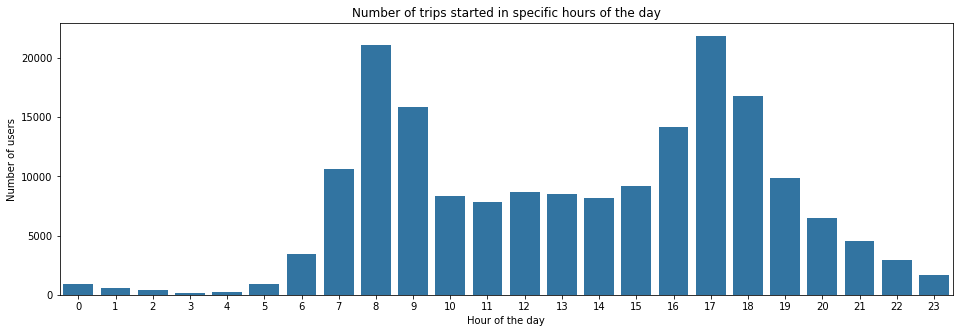

In [7]:
fig, ax = plt.subplots(figsize = (16,5))

sns.countplot(x = "start_hr", data = df, color=color, ax = ax);
plt.ylabel('Number of users')
plt.xlabel('Hour of the day')
plt.title('Number of trips started in specific hours of the day');

## Type os users in each region

> The data has information for three regions, San Francisco, East Bay, and San José, and the users are classified as either customers or subscribers, and we can see in the graph that the majority of them are subscribers, which lead me to think into two different directions:
* First, we can suppose that the majority of users begin to use the service as just customers, and if this is really the case, then we have a good product to develop because the service itself has the power to convert customers into subscribers.
* Second, is how we could develop mechanisms to try to convert even more customers into subscribers, but more importantly, how can we attract more and more customers, because since we have the power to convert them into subscribers, we need to focus on getting more customers.

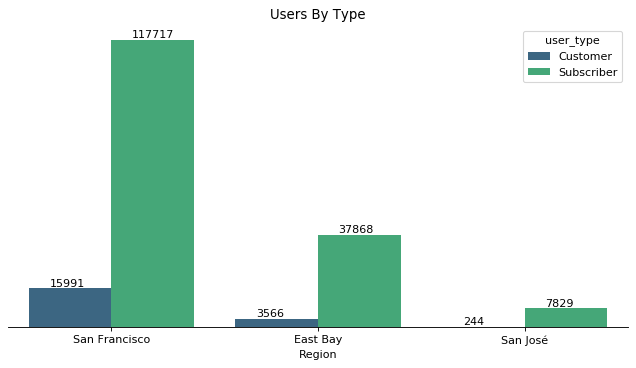

In [10]:
value_ct = df.label_name.value_counts().iloc[:31]

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
sns.countplot(x = "label_name", data = df, order=value_ct.index, palette = "viridis", hue = "user_type");

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+750))

plt.title("Users By Type");
plt.xlabel('Region');

## Users by Gender and Area

> As said in the previous slide, if we really want to improve our product, we need to know the users the best we can, and for this, I analyzed how users are classified in terms of area and gender, and by doing this, we can see some interesting facts:
* The great majority of users are men.
* This pattern is consistent across all areas that we examined.

> So, if this is the case, we need to think carefully about women's needs, for example, if the bikes are comfortable for them if the places where the bikes are placed provide the right sense of security and so many more things. 

> To conclude, I would say that we need to drive our study into this area, knowing more and more how women can use our services, and how can we improve their experience using it.

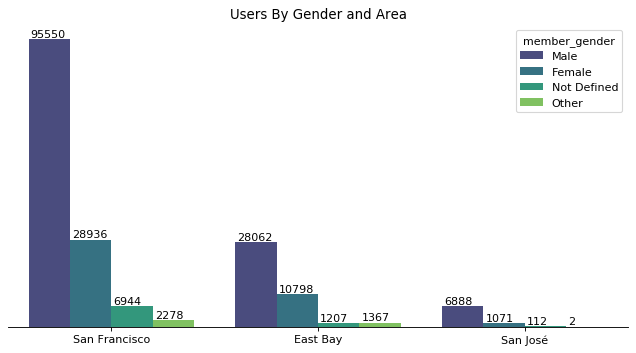

In [12]:
fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
sns.countplot(x = "label_name", data = df,  order=df.label_name.value_counts().index, palette = "viridis", hue = "member_gender");

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+750))

plt.title("Users By Gender and Area");
plt.xlabel("");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!